# LDA

In [66]:
# Import the data (MNIST) as always 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load data into memory
data = pd.read_csv('data.csv')

print(data.shape)

(42000, 785)


In [67]:
#Split the data into:
# - X, Y
# - Isolate X1, X2, X3 from X, where:
#       - X1 is the sub-data of X containing 0
#       - X2 is the sub-data of X containing 6
#       - X3 is the sub-data of X containing 9
# - Split Y into Y1, Y2, Y3 accordingly

# Convert data into a matrix
data = np.array(data)

X = data[:, 1:]
X = X.T
Y = data[:, 0]

d, N = X.shape

# Find the corresponding indeces
I1 = (Y==0)
I2 = (Y==6)
I3 = (Y==9)

# Split X and Y into X1, X2, X3 and Y1, Y2, Y3
X1 = X[:, I1]
X2 = X[:, I2]
X3 = X[:, I3]

Y1 = Y[I1]
Y2 = Y[I2]
Y3 = Y[I3]

In [68]:
# Concatenate the data
X = np.concatenate((X1, X2, X3), axis=1)
Y = np.concatenate((Y1, Y2, Y3))

In [69]:
# Within-clusters centroid
C1 = np.mean(X1, axis=1)
C2 = np.mean(X2, axis=1)
C3 = np.mean(X3, axis=1)

# Global centroid
C = np.mean(X, axis=1)

In [70]:
# Center each cluster dataset
X1c = X1 - C1.reshape((d, 1))
X2c = X2 - C2.reshape((d, 1))
X3c = X3 - C3.reshape((d, 1))

# Compute the within-cluster matrix by concatenation
Xw = np.concatenate((X1c, X2c, X3c), axis=1)

# Compute the within-cluster scatter matrix
Sw = Xw @ Xw.T

# Compute the Xbars
Xbar1 = np.repeat(C1.reshape(d, 1), X1.shape[1], axis=1)
Xbar2 = np.repeat(C2.reshape(d, 1), X2.shape[1], axis=1)
Xbar3 = np.repeat(C3.reshape(d, 1), X3.shape[1], axis=1)

# Compute the between-cluster dataset
Xbar = np.concatenate((Xbar1, Xbar2, Xbar3), axis=1)

# Compute the between-cluster centered dataset
Xbarc = Xbar - C.reshape((d, 1))

# Compute the between-cluster scatter matrix
Sb = Xbarc @ Xbarc.T

In [71]:
# We want to compute the Cholesky decomposition of Sw
try:
    L = np.linalg.cholesky(Sw)
except:
    epsilon = 1e-6
    Sw = Sw + epsilon * np.eye(Sw.shape[0])

    L = np.linalg.cholesky(Sw)

In [72]:
import scipy
import scipy.sparse
import scipy.sparse.linalg

# Compute the first k eigenvector decomposition of L^-1 Sb L
_, W = scipy.sparse.linalg.eigs(np.linalg.inv(L) @ Sb @ L, k=2)
W = np.real(W)

# Compute Q
Q = np.linalg.inv(L).T @ W

In [73]:
# Compute the projection
Z = Q.T @ X

(2, 12457)


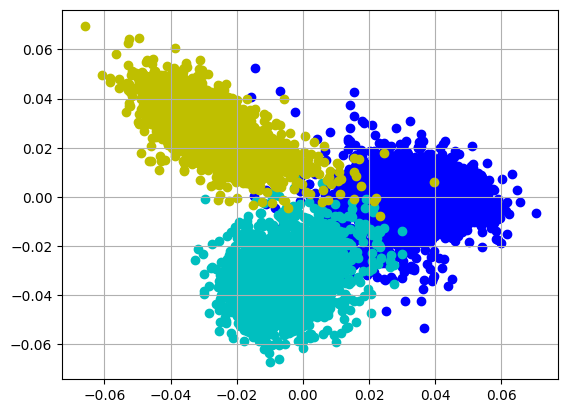

In [77]:
print(Z.shape)
plt.scatter(Z[0,Y==0],Z[1,Y==0],marker="o",color="b")
plt.scatter(Z[0,Y==6],Z[1,Y==6],marker="o",color="c")
plt.scatter(Z[0,Y==9],Z[1,Y==9],marker="o",color="y")
plt.grid()
plt.show()

